In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [2]:
cpi_data = pd.read_csv('../../Capstone/capstone_data/CPI_2000_2022.csv', thousands=',')
ppi_data = pd.read_csv('../../Capstone/capstone_data/PPI_2000_2022.csv', thousands=',')
unemployment_ratio = pd.read_csv('../../Capstone/capstone_data/NonFarm_2000_2022_unemployment_ratio.csv', thousands=',')
sp500 = pd.read_csv('../../Capstone/capstone_data/S&P_500_2000_2022.csv', thousands=',')
update_cpi = cpi_data.drop(['HALF1', 'HALF2'], axis=1)
update_sp500 = sp500.drop(['Date','Open','High','Low','Vol.','Change %'],axis=1)[::-1].reset_index(drop = True)
date_list = []
cpi_list = []
ppi_list = []
unemployed_ratio_list = []

for year in range(2000,2023):
    for month in range(1,13):
        date_list.append(str(year)+'-'+str(month))

for row in range(0,23):
    cpi_list.extend(update_cpi.iloc[row][1:])
    ppi_list.extend(ppi_data.iloc[row][1:])
    unemployed_ratio_list.extend(unemployment_ratio.iloc[row][1:])
    
    
%store date_list
%store cpi_list
%store ppi_list
%store unemployed_ratio_list
%store update_sp500

Stored 'date_list' (list)
Stored 'cpi_list' (list)
Stored 'ppi_list' (list)
Stored 'unemployed_ratio_list' (list)
Stored 'update_sp500' (DataFrame)


In [3]:
%store -r corr_2000_2022_matrix_res
corr_2000_2022_matrix_res

,CPI,PPI,Unemployed_Ratio,SP500
CPI,1.000000,0.964779,-0.002598,0.846955
PPI,0.964779,1.000000,0.055054,0.764822
Unemployed_Ratio,-0.002598,0.055054,1.000000,-0.304008
SP500,0.846955,0.764822,-0.304008,1.000000


In [4]:
%store -r corr_2010_2019_matrix_res
corr_2010_2019_matrix_res

,CPI,PPI,Unemployed_Ratio,SP500
CPI,1.000000,0.588088,-0.954372,0.975407
PPI,0.588088,1.000000,-0.398462,0.472572
Unemployed_Ratio,-0.954372,-0.398462,1.000000,-0.961570
SP500,0.975407,0.472572,-0.961570,1.000000


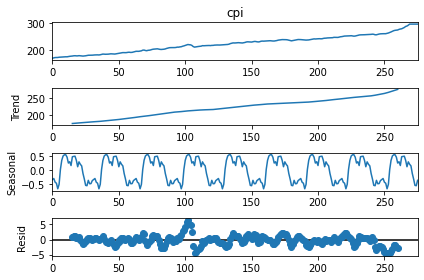

(1.2913269537254213,
 0.9965599307444631,
 11,
 264,
 {'1%': -3.455365238788105,
  '5%': -2.8725510317187024,
  '10%': -2.5726375763314966},
 582.4293125697718)

In [5]:
%store -r cpi_decompose
%store -r  df_cpi
cpi_decompose.plot()
plt.show()
adfuller(df_cpi['cpi'])

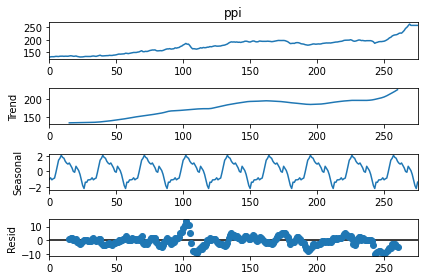

(0.5191350806982022,
 0.9854432328780417,
 2,
 273,
 {'1%': -3.45453261164607,
  '5%': -2.8721859575020017,
  '10%': -2.572442854861866},
 1018.4915716253781)

In [6]:
%store -r ppi_decompose
%store -r df_ppi
ppi_decompose.plot()
plt.show()
adfuller(df_ppi['ppi'])

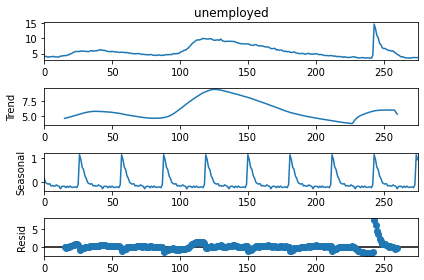

(-2.883350789246943,
 0.04731861206338188,
 0,
 275,
 {'1%': -3.454355055831705,
  '5%': -2.8721080938842976,
  '10%': -2.572401325619835},
 544.7063766512482)

In [7]:
%store -r unemployed_decompose
%store -r df_unemployed
unemployed_decompose.plot()
plt.show()
adfuller(df_unemployed['unemployed'])

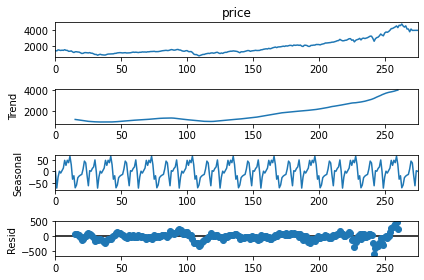

(0.07677583875392334,
 0.9644392323250373,
 7,
 268,
 {'1%': -3.454988209954765,
  '5%': -2.8723857312734613,
  '10%': -2.572549407997327},
 3069.9117220245325)

In [8]:
%store -r sp500_decompose
%store -r df_500
sp500_decompose.plot()
plt.show()
adfuller(df_500['price'])